In [130]:
import os
import numpy as np
import pylab as plt
import scipy.signal as sg
import pandas as pd

from IPython.display import Audio, display
def play(x, fs):
    display(Audio(x, rate=fs))
    
plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 150

data_dir = '/Users/kolai/Gdrive/teaching/nis21dsp/prog/data'
def load_sample(n):
    return np.load(os.path.join(data_dir, 'train.npz'))['x'][n]

fs = 16000


array([0.0054562 , 0.00840396, 0.0091409 , ..., 0.01356253, 0.01282559,
       0.01135172])

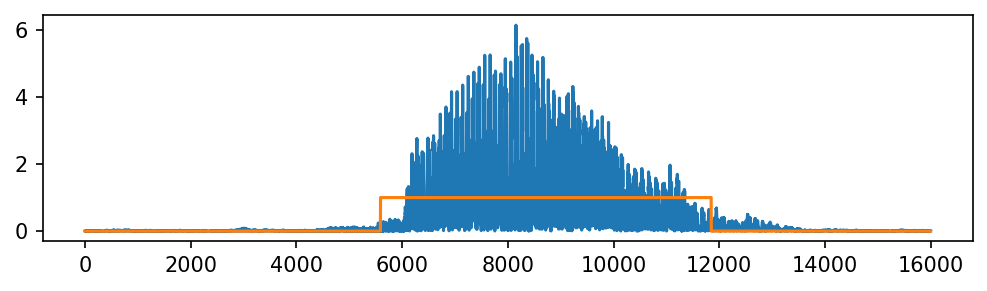

In [167]:
# Voice activity detector VAD
# plt.plot(sg.filtfilt(np.ones(1000)/1000, 1, np.abs(x))>0.1)
# plt.plot(pd.Series(np.abs(x)).rolling(window=500, center=True).max()>1)

x = load_sample(3)
plt.plot(np.abs(x))

N = 100
b = np.ones(N)/N
a = [1]

y = sg.filtfilt(b, a, np.abs(x))


# plt.plot((np.abs(x)>1)*1)

y_1 = pd.Series(np.abs(x)).rolling(window=1000, center=True).max()

plt.plot(y_1 > 1)
# plt.plot(y)
# plt.xlim(5000, 8000)

play(x, fs)
x

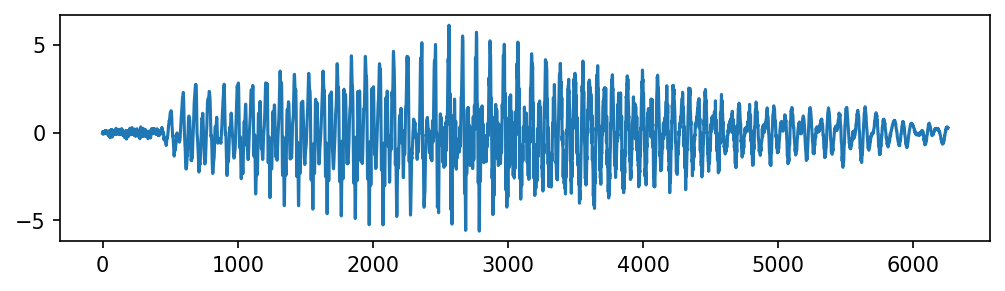

In [170]:
plt.plot(x[y_1>1])
play(x[y_1>1], fs)

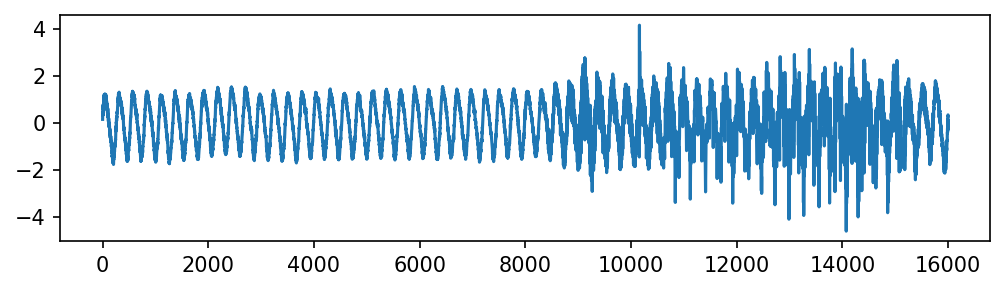

In [171]:
# Noisy example, VAD fail
x = load_sample(4)

plt.plot(x)
play(x, fs)

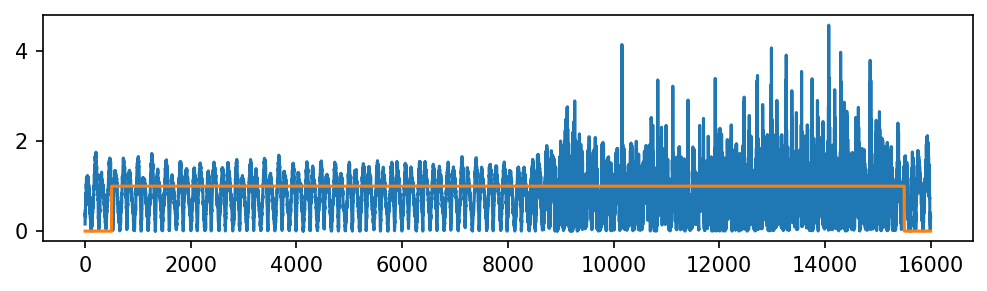

In [172]:

plt.plot(np.abs(x))

N = 100
b = np.ones(N)/N
a = [1]

y = sg.filtfilt(b, a, np.abs(x))


# plt.plot((np.abs(x)>1)*1)

y_1 = pd.Series(np.abs(x)).rolling(window=1000, center=True).max()

plt.plot(y_1 > 1)
# plt.plot(y)
# plt.xlim(5000, 8000)

play(x, fs)

2.0

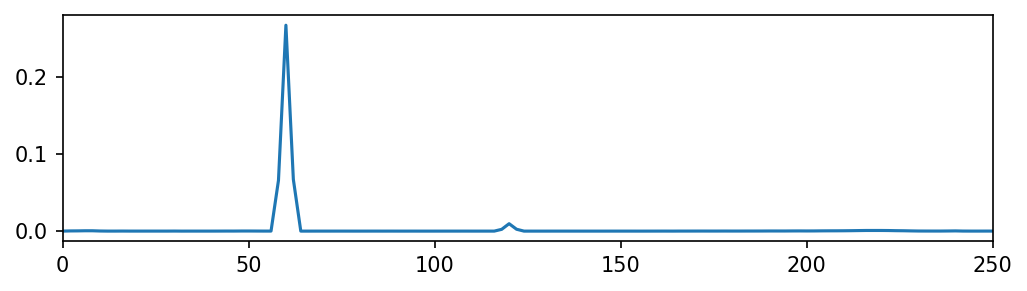

In [183]:
# Look at spec
# plt.plot(*sg.welch(x, fs, nperseg=8000, noverlap=7000))
# plt.xlim(0, 1000)

freq, spec = sg.welch(x, fs, nperseg=8000)
plt.plot(freq, spec)
plt.xlim(0, 250)

freq[1]-freq[0]

Text(0, 0.5, 'A(freq)')

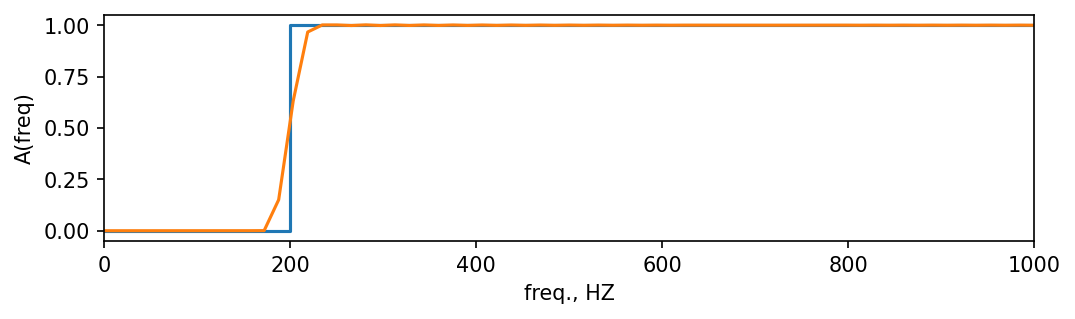

In [208]:
# Desired Mag Response and approx
# b = sg.firwin2(1001, freqs0, H0, fs=fs)
# freq, H = sg.freqz(b, fs=fs)
# plt.plot(freq, np.abs(H))



freqs0 = [0, 200, 200, 8000]
H0 = [0, 0, 1, 1]

b = sg.firwin2(1001, freqs0, H0, fs=fs)
freq, H = sg.freqz(b, fs=fs)

plt.plot(freqs0, H0)

plt.plot(freq, np.abs(H))
plt.xlim(0, 1000)
plt.xlabel('freq., HZ')
plt.ylabel('A(freq)')

# plt.plot(b)

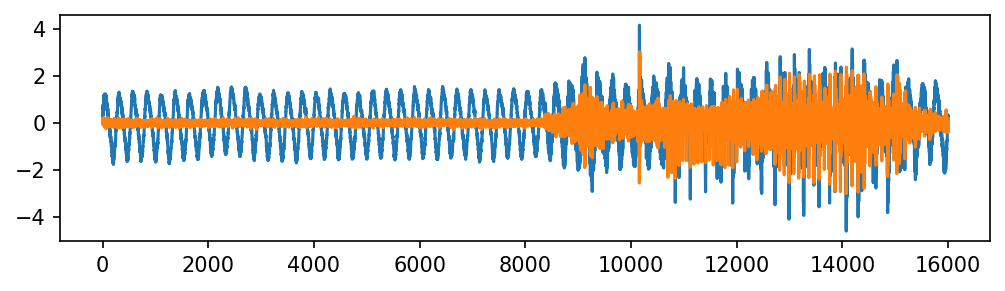

In [209]:
# Filtration result
# plt.plot(sg.filtfilt(b, 1, x))
# play()

y = sg.filtfilt(b=b, a=[1.], x=x)
plt.plot(x)
# plt.plot(x-y)
plt.plot(y)


play(y, fs)

(0.0, 1000.0)

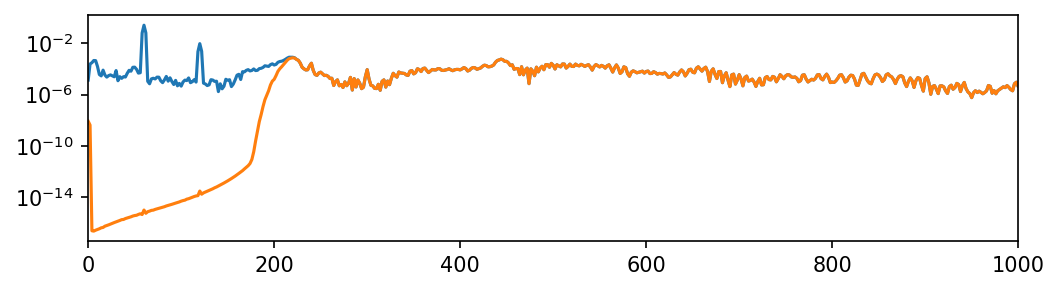

In [210]:
# Compare spec
freq, spec = sg.welch(x, fs, nperseg=8000)
plt.semilogy(freq, spec)



freq, spec = sg.welch(y, fs, nperseg=8000)
plt.plot(freq, spec)
plt.xlim(0, 1000)


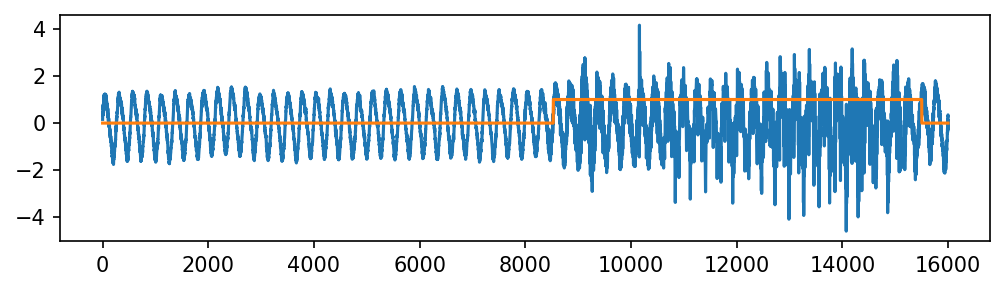

In [212]:
# VAD after filtration


plt.plot(x)

N = 100
b = np.ones(N)/N
a = [1]



# plt.plot((np.abs(x)>1)*1)



y_1 = pd.Series(np.abs(y)).rolling(window=1000, center=True).max()

plt.plot(y_1 > 1)
# plt.plot(y)
# plt.xlim(5000, 8000)

play(x, fs)

Text(0, 0.5, 'A(freq)')

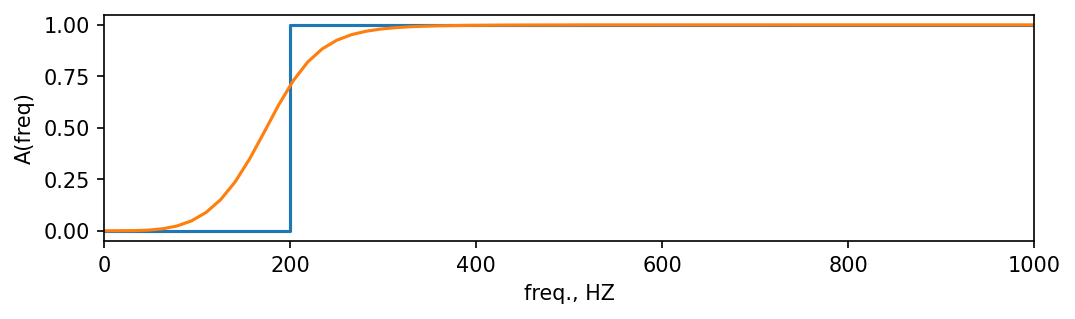

In [225]:
# IIR filter and Mag Response
# plt.plot(sg.filtfilt(*sg.butter(4, 200, 'highpass', fs=fs), x))

b, a = sg.butter(4, 200, 'high', fs=fs)

freqs0 = [0, 200, 200, 8000]
H0 = [0, 0, 1, 1]


freq, H = sg.freqz(b, a, fs=fs)

plt.plot(freqs0, H0)

plt.plot(freq, np.abs(H))
plt.xlim(0, 1000)
plt.xlabel('freq., HZ')
plt.ylabel('A(freq)')

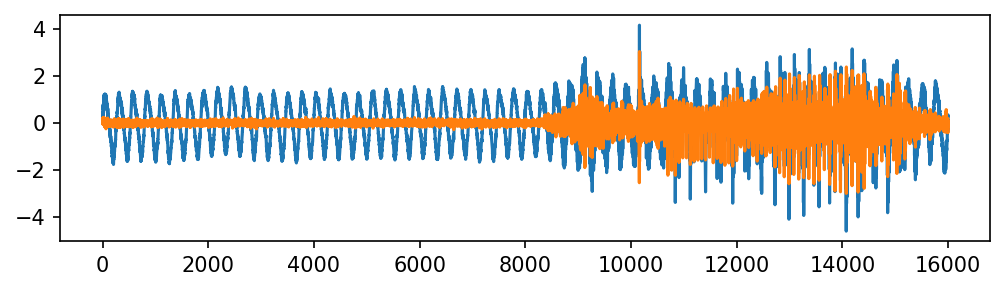

In [220]:
y = sg.filtfilt(b=b, a=a, x=x)
plt.plot(x)
# plt.plot(x-y)
plt.plot(y)


play(y, fs)

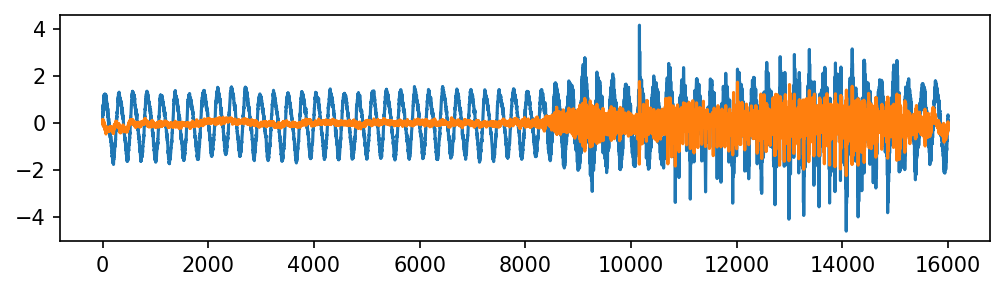

In [232]:
# Comb filter and Mag Response
#plt.plot(sg.filtfilt(*sg.iircomb(60/fs, 3), x))

b, a = sg.iircomb(60/fs, 3)

y = sg.filtfilt(b=b, a=a, x=x)
plt.plot(x)
# plt.plot(x-y)
plt.plot(y)


play(y, fs)

(0.0, 1000.0)

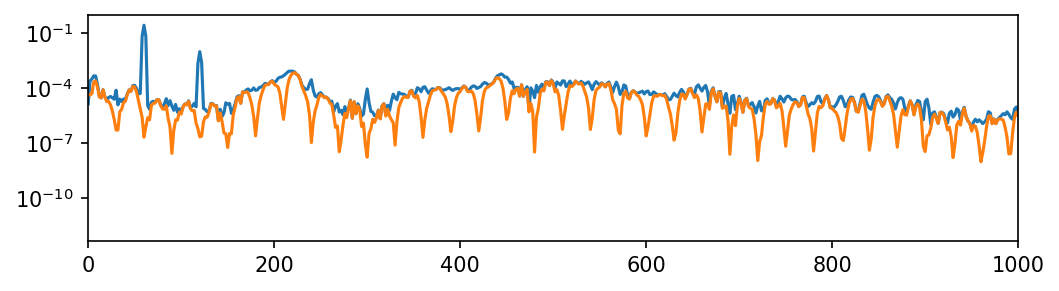

In [233]:
freq, spec = sg.welch(x, fs, nperseg=8000)
plt.semilogy(freq, spec)



freq, spec = sg.welch(y, fs, nperseg=8000)
plt.plot(freq, spec)
plt.xlim(0, 1000)